# Problem 1

In [748]:
import sympy as sy
from matplotlib import pyplot as plt
import numpy as np

In [715]:
def function(domain):
    x = sy.symbols('x')
    func = lambda domain: (sy.sin(x) + 1) ** sy.sin(sy.cos(x))
    f = sy.lambdify(x, func(x))
    return f(domain)

def derivative(domain):
    x = sy.symbols('x')
    func_prime = lambda domain: sy.diff((sy.sin(x) + 1) ** sy.sin(sy.cos(x)), x)
    f_prime = sy.lambdify(x, func_prime(x))
    return f_prime(domain)

In [716]:
x = np.linspace(-np.pi, np.pi, 100)
f = function(x)
f_prime = derivative(x)

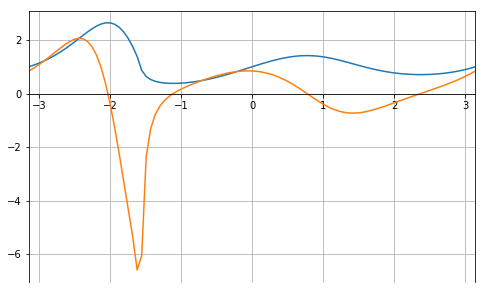

In [691]:
fig, ax = plt.subplots(figsize=(8,5))
ax.spines["bottom"].set_position("zero")
ax.plot(x, f)
ax.plot(x, f_prime)
ax.set_xlim(-np.pi, np.pi)
ax.grid(True)
plt.show()

# Problem 2

In [692]:
forward_ord_1 = lambda f, x, h: (f(x + h) - f(x)) / h
forward_ord_2 = lambda f, x, h: (-3 * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
backward_ord_1 = lambda f, x, h: (f(x) - f(x - h)) / h
backward_ord_2 = lambda f, x, h: (3 * f(x) - 4 * f(x - h) + f(x - 2 * h)) / (2 * h)
centered_ord_2 = lambda f, x, h: (f(x + h) - f(x - h)) / (2 * h)
centered_ord_4 = lambda f, x, h: (f(x - 2 * h) - 8 * f(x - h) + 8 * f(x + h) - f(x + 2 * h)) / (12 * h)

In [693]:
forward_1_1 = forward_ord_1(function, x, 1e-1)
forward_2_1 = forward_ord_2(function, x, 1e-1)
backward_1_1 = backward_ord_1(function, x, 1e-1)
backward_2_1 = backward_ord_2(function, x, 1e-1)
centered_2_1 = centered_ord_2(function, x, 1e-1)
centered_4_1 = centered_ord_4(function, x, 1e-1)

forward_1_2 = forward_ord_1(function, x, 1e-6)
forward_2_2 = forward_ord_2(function, x, 1e-6)
backward_1_2 = backward_ord_1(function, x, 1e-6)
backward_2_2 = backward_ord_2(function, x, 1e-6)
centered_2_2 = centered_ord_2(function, x, 1e-6)
centered_4_2 = centered_ord_4(function, x, 1e-6)

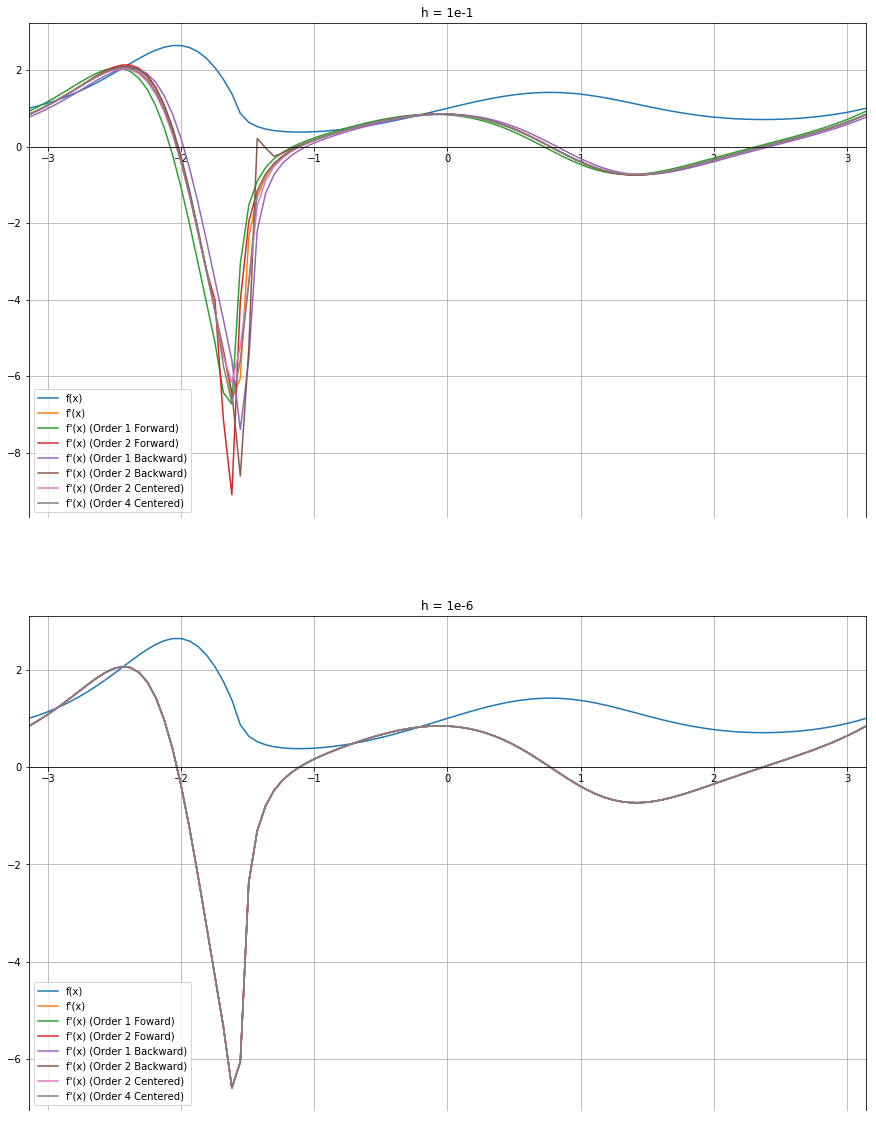

In [694]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
axes[0].spines["bottom"].set_position("zero")
axes[0].plot(x, f, label="f(x)")
axes[0].plot(x, f_prime, label="f'(x)")
axes[0].plot(x, forward_1_1, label="f'(x) (Order 1 Forward)")
axes[0].plot(x, forward_2_1, label="f'(x) (Order 2 Forward)")
axes[0].plot(x, backward_1_1, label="f'(x) (Order 1 Backward)")
axes[0].plot(x, backward_2_1, label="f'(x) (Order 2 Backward)")
axes[0].plot(x, centered_2_1, label="f'(x) (Order 2 Centered)")
axes[0].plot(x, centered_4_1, label="f'(x) (Order 4 Centered)")
axes[0].set_title("h = 1e-1")
axes[0].set_xlim(-np.pi, np.pi)
axes[0].grid(True)
axes[0].legend()

axes[1].spines["bottom"].set_position("zero")
axes[1].plot(x, f, label="f(x)")
axes[1].plot(x, f_prime, label="f'(x)")
axes[1].plot(x, forward_1_2, label="f'(x) (Order 1 Foward)")
axes[1].plot(x, forward_2_2, label="f'(x) (Order 2 Foward)")
axes[1].plot(x, backward_1_2, label="f'(x) (Order 1 Backward)")
axes[1].plot(x, backward_2_2, label="f'(x) (Order 2 Backward)")
axes[1].plot(x, centered_2_2, label="f'(x) (Order 2 Centered)")
axes[1].plot(x, centered_4_2, label="f'(x) (Order 4 Centered)")
axes[1].set_title("h = 1e-6")
axes[1].set_xlim(-np.pi, np.pi)
axes[1].grid(True)
axes[1].legend()
plt.show()

# Problem 3

In [695]:
def error(x):
    d = derivative(x)
    h_list = np.logspace(-8, 0, 9)
    approx = np.empty((len(h_list), 6))
    for i, h in enumerate(h_list):
        approx[i, 0] = forward_ord_1(function, x, h)
        approx[i, 1] = forward_ord_2(function, x, h)
        approx[i, 2] = backward_ord_1(function, x, h)
        approx[i, 3] = backward_ord_2(function, x, h)
        approx[i, 4] = centered_ord_2(function, x, h)
        approx[i, 5] = centered_ord_4(function, x, h)
    
    plt.figure(figsize=(8, 5))
    labels = ["Order 1 Forward", "Order 2 Forward", "Order 1 Backward", "Order 2 Backward", 
             "Order 2 Centered", "Order 4 Centered"]
    for i in range(6):
        plt.loglog(h_list, np.abs(d - approx[:, i]), linestyle='-', marker='.', label=labels[i])
    plt.legend()
    plt.xlabel("h")
    plt.ylabel("Absolute Error")
    plt.show()

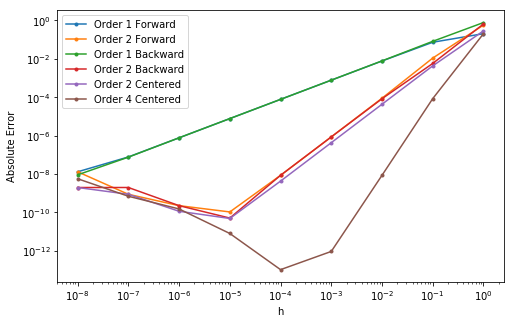

In [696]:
error(1)

# Problem 4

In [743]:
plane = np.load("plane.npy")

In [744]:
α = np.deg2rad(plane[:, 1])
β = np.deg2rad(plane[:, 2])
x = 500 * np.tan(β) / (np.tan(β) - np.tan(α))
y = 500 * (np.tan(β) * np.tan(α)) / (np.tan(β) - np.tan(α))

In [745]:
x_prime, y_prime = np.empty_like(x), np.empty_like(y)

In [746]:
x_prime[0] = (-3 * x[0] + 4 * x[1] - x[2]) / 2
y_prime[0] = (-3 * y[0] + 4 * y[1] - y[2]) / 2
x_prime[7] = (3 * x[7] - 4 * x[6] + x[5]) / 2
y_prime[7] = (3 * y[7] - 4 * y[6] + y[5]) / 2
for i in range(1, 7):
    x_prime[i] = (x[i+1] - x[i-1]) / 2
    
speed = np.sqrt(x_prime ** 2 + y_prime ** 2)

In [747]:
speed

array([45.85055204, 45.33151762, 47.28679586, 48.36641951, 46.65582394,
       49.70449049, 51.90182758, 49.10676247])

# Problem 5

In [702]:
def jacobian(f, x, h):
    n = len(x)
    m = len(f(x))
    jacobian = np.empty((n, m))
    for j in range(n):
        e = np.identity(n)[j]
        jacobian[:, j] = (f(x + h * e) - f(x - h * e)) / (2 * h)
    return jacobian

In [703]:
f = lambda X: np.array([X[0] ** 2, X[0] ** 3 - X[1]]).T
X = np.array([1, 2])
jacobian(f, X, 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

# Problem 6

In [704]:
from autograd import numpy as anp
from autograd import elementwise_grad

In [705]:
def T(x, n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2 * x * T(x, n - 1) - T(x, n - 2)

In [706]:
def T_prime(x, n):
    t_prime = elementwise_grad(T, 0)
    return t_prime(x, n)

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


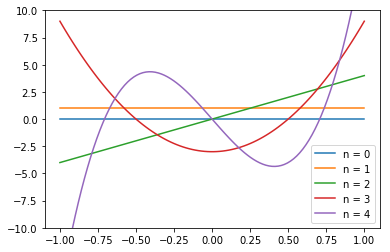

In [707]:
x = anp.linspace(-1, 1, 100)
n_list = np.arange(0, 5)
chebyshev = np.empty((5, len(x)))
for i, n in enumerate(n_list):
    chebyshev[i] = T_prime(x, n)
    plt.plot(x, chebyshev[i], label=f"n = {n}")
plt.legend()
plt.ylim([-10, 10])
plt.show()

# Problem 7

In [708]:
import time
from autograd import grad

In [741]:
def time_vs_error(N):
    errors = np.zeros((3, N))
    errors[0] = np.full(N, 1e-18)
    times = np.zeros((3, N))
    
    for n in range(N):
        
        x = np.random.random()
        start_1 = time.time()
        d = derivative(x)
        end_1 = time.time()
        times[0, n] = end_1 - start_1
    
        f = lambda x: (anp.sin(x) + 1) ** anp.sin(anp.cos(x))
        start_2 = time.time()
        errors[1, n] = d - centered_ord_4(f, x, 1e-5)
        end_2 = time.time()
        times[1, n] = end_2 - start_2
        
        start_3 = time.time()
        errors[2, n] = d - grad(f)(x)
        end_3 = time.time()
        times[2, n] = end_3 - start_3
        
    labels = ['SymPy', 'Difference Quotients', 'Autograd']
    for i in range(3):
        plt.scatter(times[i], errors[i], alpha=0.5, label=labels[i])
    
    plt.xlim([1e-5, 1e-1])
    plt.ylim([1e-19, 1e-10])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    plt.legend()
    plt.show()

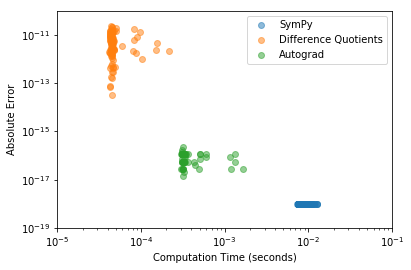

In [742]:
time_vs_error(200)